# bootstrap

- 복원추출을 반복

trian을 train과 validation data로...

- Exhaustive Search
- Sequential Forward Selection(SFS)
- Backward Elimination(BE)
- Stochastic Search

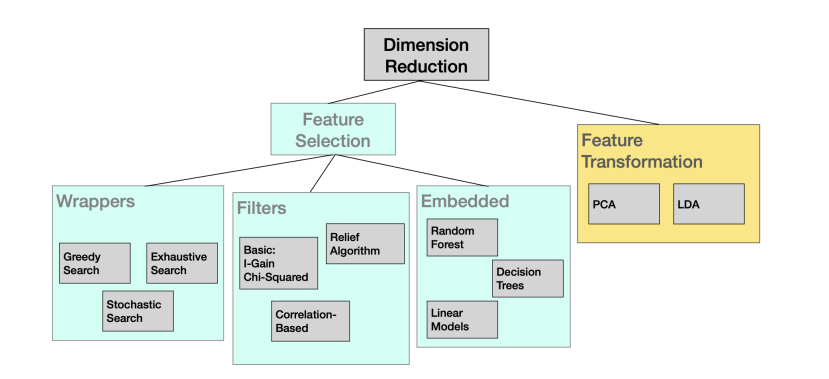

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer(as_frame=True)
breast = data.frame

In [7]:
X_train, X_test, y_train, y_test = train_test_split(breast.iloc[:,:-1], breast.target)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
dt = DecisionTreeClassifier()

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
dt.feature_importances_

array([0.01757886, 0.01859302, 0.        , 0.00507082, 0.02755883,
       0.        , 0.00478869, 0.00760624, 0.        , 0.01040169,
       0.        , 0.        , 0.        , 0.0201592 , 0.        ,
       0.01769913, 0.        , 0.0067611 , 0.        , 0.        ,
       0.        , 0.02784582, 0.70949318, 0.01528796, 0.        ,
       0.00499221, 0.02413486, 0.08202839, 0.        , 0.        ])

43

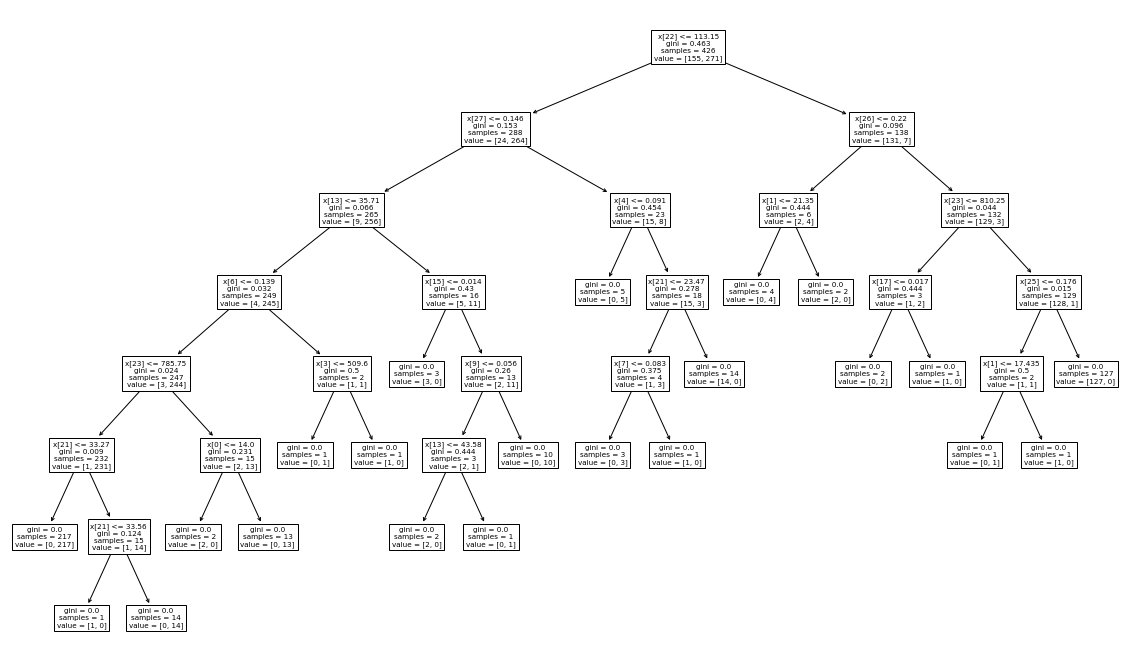

In [14]:
plt.figure(figsize=(20,12))
len(plot_tree(dt))

In [15]:
dt.score(X_test, y_test)

0.9230769230769231

In [17]:
import numpy as np

In [20]:
np.nonzero(dt.feature_importances_)[0]

array([ 0,  1,  3,  4,  6,  7,  9, 13, 15, 17, 21, 22, 23, 25, 26, 27],
      dtype=int64)

In [22]:
X_re = breast.iloc[:,np.nonzero(dt.feature_importances_)[0]].copy()

In [23]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, breast.target)

In [24]:
dt2 = DecisionTreeClassifier()

In [25]:
dt2.fit(X_train_re, y_train_re)

DecisionTreeClassifier()

In [26]:
dt2.score(X_test_re, y_test_re)

0.951048951048951

# wrappers

In [28]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
rfe = RFE(KNeighborsClassifier())

In [31]:
rfe.fit(X_train, y_train)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [33]:
!pip install -U feature-engine

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(5)

In [36]:
pca.fit_transform(X_train, y_train)

array([[-376.89375813,  -26.64365673,    8.92137122,    9.2350726 ,
           3.088533  ],
       [-354.48463551,   31.6105502 ,    2.69595909,   -1.84713938,
          -2.61659855],
       [-260.99679674,  -28.96596666,   -5.38425286,   -7.05664495,
          -9.66706481],
       ...,
       [-633.62009049,   50.43679223,    4.38721472,    3.63064437,
          -2.81482118],
       [-190.95038557,    2.6712514 ,   -4.3084253 ,    1.06647213,
           2.30576895],
       [-403.51370004,  -24.18886633,    1.47218459,    9.78833712,
           1.56072357]])

In [37]:
from sklearn.manifold import TSNE

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, KFold

In [40]:
from sklearn import model_selection

In [41]:
[x for x in dir(model_selection) if 'Fold' in x]

['GroupKFold',
 'KFold',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'StratifiedGroupKFold',
 'StratifiedKFold']

In [43]:
k = KFold(5)

In [45]:
a = k.split(breast.iloc[:,:-1], breast.target)

In [51]:
# 5개 나온다
next(a)

StopIteration: 

In [ ]:
from sklearn.model_selection import 

In [39]:
cross_val_predict(KNeighborsClassifier(), breast.iloc[:,:-1], breast.target, cv=5)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [52]:
from sklearn.utils import resample

In [74]:
resample([1,2,3,4,5,6,7,8])

[5, 5, 4, 5, 5, 5, 4, 1]

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [83]:
vc = VotingClassifier([('knn', KNeighborsClassifier()), 
                       ('lr', LogisticRegression()), 
                       ('tree', DecisionTreeClassifier())])

In [84]:
vc.get_params()

{'estimators': [('knn', KNeighborsClassifier()),
  ('lr', LogisticRegression()),
  ('tree', DecisionTreeClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'knn': KNeighborsClassifier(),
 'lr': LogisticRegression(),
 'tree': DecisionTreeClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'tree__ccp_alpha': 0.0,
 'tree__class_weight': None,
 'tree__criterion': 'gini',
 'tree__max_depth': None,
 'tree__max_features': None,

In [81]:
vs.fit(X_train, y_train)

NameError: name 'vs' is not defined

In [ ]:
vc.predict(y_test)